In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [3]:
model = Sequential()
model.add(Conv1D(filters=32*8, kernel_size=5, activation="relu", padding="same", input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save(filepath="../SpeechER/models/model3.h5")

2023-06-09 21:13:18.818567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:13:18.839460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:13:18.839624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:13:18.841404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:13:18.841589: I tensorflow/compiler/xla/stream_executo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 33, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 33, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 128)           163968    
                                                                 
 conv1d_2 (Conv1D)           (None, 33, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 128)           0

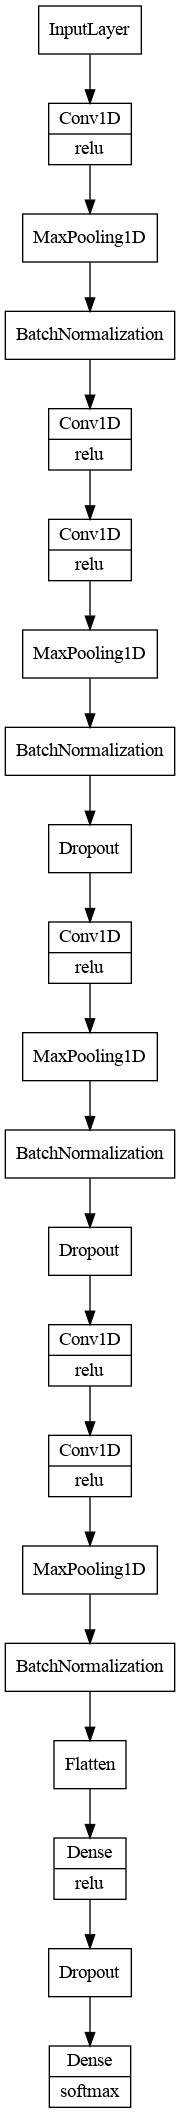

In [4]:
plot_model(model, "../SpeechER/figs/m3arc.png", show_layer_names=False, show_layer_activations=True)

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model3_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)

In [6]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint])

Epoch 1/100


2023-06-04 10:11:14.187936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901
2023-06-04 10:11:14.814975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


856/856 [==============================] - ETA: 0s - loss: 1.6900 - accuracy: 0.3297

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 13s 9ms/step - loss: 1.6900 - accuracy: 0.3297 - val_loss: 1.6126 - val_accuracy: 0.3550
Epoch 2/100
852/856 [============================>.] - ETA: 0s - loss: 1.4358 - accuracy: 0.4320

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 8ms/step - loss: 1.4356 - accuracy: 0.4323 - val_loss: 1.5705 - val_accuracy: 0.3749
Epoch 3/100
853/856 [============================>.] - ETA: 0s - loss: 1.3442 - accuracy: 0.4699

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 9ms/step - loss: 1.3446 - accuracy: 0.4698 - val_loss: 1.4409 - val_accuracy: 0.4347
Epoch 4/100
856/856 [==============================] - ETA: 0s - loss: 1.2873 - accuracy: 0.4920

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.2873 - accuracy: 0.4920 - val_loss: 1.3143 - val_accuracy: 0.4678
Epoch 5/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2543 - accuracy: 0.5058 - val_loss: 1.5120 - val_accuracy: 0.3977
Epoch 6/100
856/856 [==============================] - 6s 7ms/step - loss: 1.2255 - accuracy: 0.5166 - val_loss: 1.5469 - val_accuracy: 0.4084
Epoch 7/100
850/856 [============================>.] - ETA: 0s - loss: 1.2073 - accuracy: 0.5274

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.2074 - accuracy: 0.5272 - val_loss: 1.2143 - val_accuracy: 0.5243
Epoch 8/100
852/856 [============================>.] - ETA: 0s - loss: 1.1844 - accuracy: 0.5368

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 8ms/step - loss: 1.1847 - accuracy: 0.5366 - val_loss: 1.1560 - val_accuracy: 0.5409
Epoch 9/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1702 - accuracy: 0.5409 - val_loss: 1.1971 - val_accuracy: 0.5298
Epoch 10/100
854/856 [============================>.] - ETA: 0s - loss: 1.1514 - accuracy: 0.5482

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.1514 - accuracy: 0.5482 - val_loss: 1.1155 - val_accuracy: 0.5607
Epoch 11/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1379 - accuracy: 0.5526 - val_loss: 1.1876 - val_accuracy: 0.5226
Epoch 12/100
856/856 [==============================] - 6s 7ms/step - loss: 1.1241 - accuracy: 0.5606 - val_loss: 1.1474 - val_accuracy: 0.5516
Epoch 13/100
848/856 [============================>.] - ETA: 0s - loss: 1.1007 - accuracy: 0.5682

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 9ms/step - loss: 1.1012 - accuracy: 0.5681 - val_loss: 1.1145 - val_accuracy: 0.5576
Epoch 14/100
856/856 [==============================] - ETA: 0s - loss: 1.0976 - accuracy: 0.5692

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.0976 - accuracy: 0.5692 - val_loss: 1.1091 - val_accuracy: 0.5592
Epoch 15/100
852/856 [============================>.] - ETA: 0s - loss: 1.0815 - accuracy: 0.5776

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 9ms/step - loss: 1.0809 - accuracy: 0.5779 - val_loss: 1.0841 - val_accuracy: 0.5707
Epoch 16/100
852/856 [============================>.] - ETA: 0s - loss: 1.0655 - accuracy: 0.5863

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.0653 - accuracy: 0.5865 - val_loss: 1.0705 - val_accuracy: 0.5717
Epoch 17/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0608 - accuracy: 0.5854 - val_loss: 1.0992 - val_accuracy: 0.5661
Epoch 18/100
854/856 [============================>.] - ETA: 0s - loss: 1.0459 - accuracy: 0.5936

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 9ms/step - loss: 1.0458 - accuracy: 0.5938 - val_loss: 1.0631 - val_accuracy: 0.5799
Epoch 19/100
853/856 [============================>.] - ETA: 0s - loss: 1.0335 - accuracy: 0.5979

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.0335 - accuracy: 0.5980 - val_loss: 1.0276 - val_accuracy: 0.5947
Epoch 20/100
850/856 [============================>.] - ETA: 0s - loss: 1.0193 - accuracy: 0.6054

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 1.0197 - accuracy: 0.6051 - val_loss: 1.0130 - val_accuracy: 0.5957
Epoch 21/100
856/856 [==============================] - 6s 7ms/step - loss: 1.0220 - accuracy: 0.6074 - val_loss: 1.0407 - val_accuracy: 0.5978
Epoch 22/100
848/856 [============================>.] - ETA: 0s - loss: 1.0070 - accuracy: 0.6095

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 9ms/step - loss: 1.0068 - accuracy: 0.6093 - val_loss: 1.0029 - val_accuracy: 0.6007
Epoch 23/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9950 - accuracy: 0.6155 - val_loss: 1.0500 - val_accuracy: 0.5935
Epoch 24/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9823 - accuracy: 0.6225 - val_loss: 1.0605 - val_accuracy: 0.5840
Epoch 25/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9781 - accuracy: 0.6248 - val_loss: 1.0437 - val_accuracy: 0.5981
Epoch 26/100
856/856 [==============================] - ETA: 0s - loss: 0.9688 - accuracy: 0.6235

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 7s 9ms/step - loss: 0.9688 - accuracy: 0.6235 - val_loss: 0.9985 - val_accuracy: 0.6051
Epoch 27/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9580 - accuracy: 0.6310 - val_loss: 1.0327 - val_accuracy: 0.5925
Epoch 28/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9429 - accuracy: 0.6386 - val_loss: 1.0100 - val_accuracy: 0.6052
Epoch 29/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9345 - accuracy: 0.6393 - val_loss: 1.0072 - val_accuracy: 0.6073
Epoch 30/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9535 - accuracy: 0.6303 - val_loss: 1.0004 - val_accuracy: 0.6148
Epoch 31/100
853/856 [============================>.] - ETA: 0s - loss: 0.9243 - accuracy: 0.6421

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 0.9248 - accuracy: 0.6423 - val_loss: 0.9780 - val_accuracy: 0.6238
Epoch 32/100
856/856 [==============================] - 6s 7ms/step - loss: 0.9183 - accuracy: 0.6490 - val_loss: 0.9968 - val_accuracy: 0.6178
Epoch 33/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8984 - accuracy: 0.6548 - val_loss: 0.9901 - val_accuracy: 0.6205
Epoch 34/100
856/856 [==============================] - 6s 8ms/step - loss: 0.9105 - accuracy: 0.6497 - val_loss: 1.0224 - val_accuracy: 0.6068
Epoch 35/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8921 - accuracy: 0.6583 - val_loss: 1.0024 - val_accuracy: 0.6168
Epoch 36/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8798 - accuracy: 0.6652 - val_loss: 0.9956 - val_accuracy: 0.6128
Epoch 37/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8726 - accuracy: 0.6654 - val_loss: 0.9834 - val_accuracy: 0.6284
Epoch

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 0.8400 - accuracy: 0.6796 - val_loss: 0.9697 - val_accuracy: 0.6267
Epoch 43/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8251 - accuracy: 0.6869 - val_loss: 0.9987 - val_accuracy: 0.6210
Epoch 44/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8256 - accuracy: 0.6862 - val_loss: 0.9730 - val_accuracy: 0.6219
Epoch 45/100
856/856 [==============================] - 7s 8ms/step - loss: 0.8208 - accuracy: 0.6892 - val_loss: 0.9809 - val_accuracy: 0.6262
Epoch 46/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8047 - accuracy: 0.6927 - val_loss: 0.9731 - val_accuracy: 0.6297
Epoch 47/100
856/856 [==============================] - 6s 7ms/step - loss: 0.8069 - accuracy: 0.6932 - val_loss: 1.0311 - val_accuracy: 0.6230
Epoch 48/100
856/856 [==============================] - 6s 7ms/step - loss: 0.7982 - accuracy: 0.7002 - val_loss: 0.9809 - val_accuracy: 0.6365
Epoch

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model3_best/assets


856/856 [==============================] - 8s 9ms/step - loss: 0.7696 - accuracy: 0.7109 - val_loss: 0.9440 - val_accuracy: 0.6424
Epoch 53/100
856/856 [==============================] - 6s 7ms/step - loss: 0.7565 - accuracy: 0.7165 - val_loss: 1.0220 - val_accuracy: 0.6221
Epoch 54/100
856/856 [==============================] - 6s 8ms/step - loss: 0.7565 - accuracy: 0.7188 - val_loss: 0.9520 - val_accuracy: 0.6394
Epoch 55/100
856/856 [==============================] - 6s 7ms/step - loss: 0.7463 - accuracy: 0.7220 - val_loss: 0.9816 - val_accuracy: 0.6335
Epoch 56/100
856/856 [==============================] - 6s 7ms/step - loss: 0.7417 - accuracy: 0.7216 - val_loss: 0.9760 - val_accuracy: 0.6307
Epoch 57/100
856/856 [==============================] - 6s 7ms/step - loss: 0.7273 - accuracy: 0.7292 - val_loss: 0.9783 - val_accuracy: 0.6380
Epoch 58/100
856/856 [==============================] - 6s 7ms/step - loss: 0.7303 - accuracy: 0.7298 - val_loss: 0.9973 - val_accuracy: 0.6294
Epoch

In [7]:
eval = model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 2ms/step - loss: 1.0020 - accuracy: 0.6333


In [8]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 1s 1ms/step


,Predicted Labels,Actual Labels
0,fear,disgust
1,sad,sad
2,happy,happy
3,happy,disgust
4,happy,happy
5,calm,calm
6,fear,happy
7,disgust,neutral
8,surprise,surprise
9,sad,sad


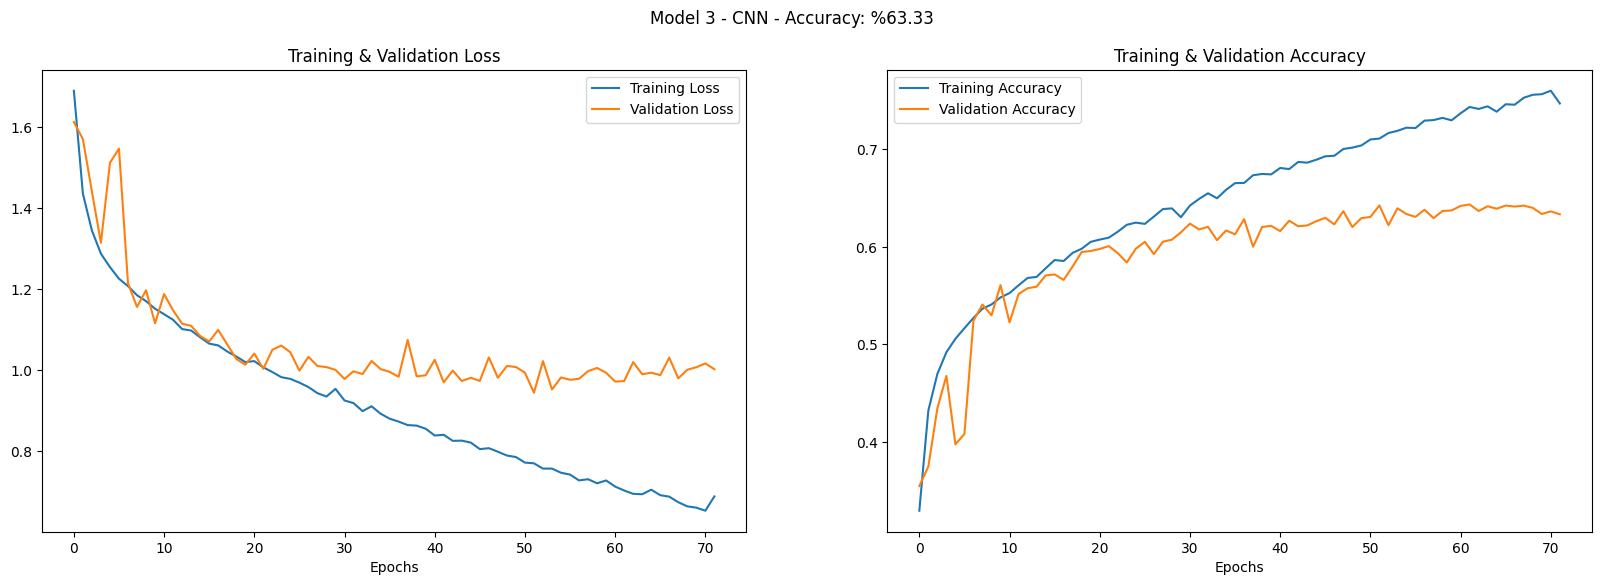

In [10]:
epochs = [i for i in range(stop_early.stopped_epoch + 1)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 3 - CNN - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model3.png")

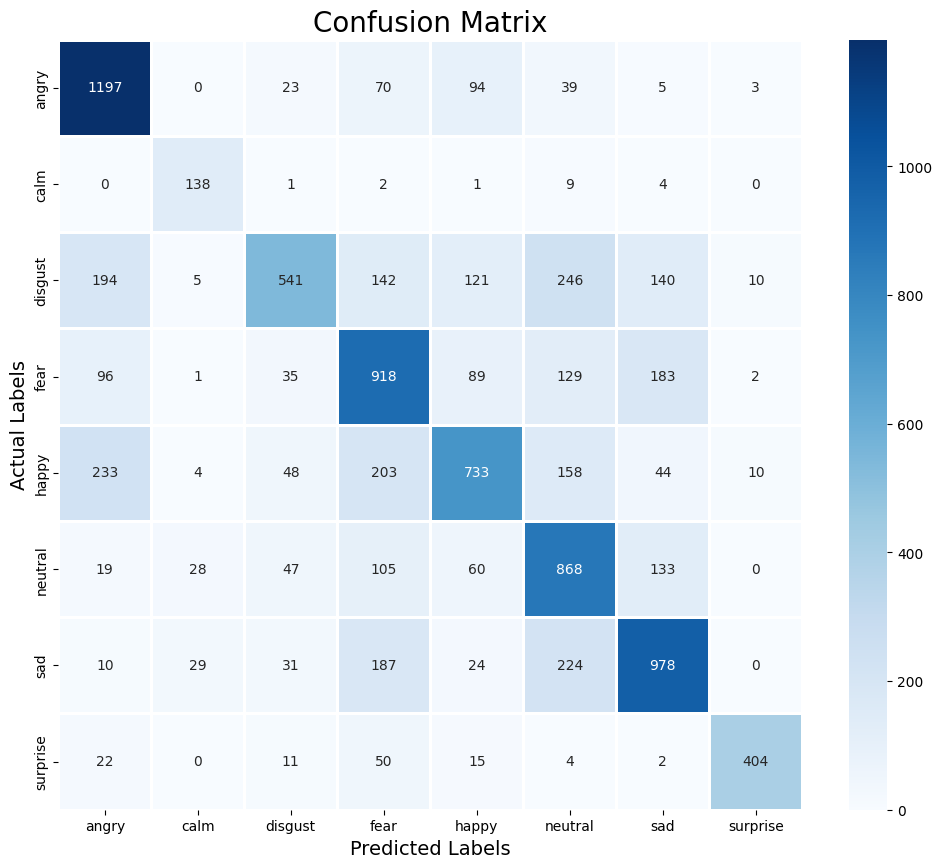

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.68      0.84      0.75      1431
        calm       0.67      0.89      0.77       155
     disgust       0.73      0.39      0.51      1399
        fear       0.55      0.63      0.59      1453
       happy       0.64      0.51      0.57      1433
     neutral       0.52      0.69      0.59      1260
         sad       0.66      0.66      0.66      1483
    surprise       0.94      0.80      0.86       508

    accuracy                           0.63      9122
   macro avg       0.67      0.68      0.66      9122
weighted avg       0.65      0.63      0.63      9122

